In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations
from tqdm import tqdm

## 6.5.1 Subset Selection Methods

### Best Subset Selection

In [2]:
hitters = pd.read_csv('../data/hitters.csv')
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
list(hitters.columns)

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'League',
 'Division',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary',
 'NewLeague']

In [4]:
hitters.shape

(322, 20)

In [5]:
# Salary variable is missing for some of the players
hitters.isna().any()

AtBat        False
Hits         False
HmRun        False
Runs         False
RBI          False
Walks        False
Years        False
CAtBat       False
CHits        False
CHmRun       False
CRuns        False
CRBI         False
CWalks       False
League       False
Division     False
PutOuts      False
Assists      False
Errors       False
Salary        True
NewLeague    False
dtype: bool

In [6]:
# We see that Salary is missing for 59 players
hitters.Salary.isna().sum()

59

In [7]:
# Removing all of the rows have missing value in any variable
hitters.dropna(axis=0, inplace=True)
hitters.shape

(263, 20)

In [8]:
hitters.isna().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [9]:
# get dummy variables
hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 0]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 0]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 0]

In [10]:
X = hitters.drop(['Salary'], axis=1)
y = hitters.Salary

In [11]:
def process_linear_model(subset, data, response):
    x_train = sm.add_constant(data[subset])
    model = sm.OLS(response, x_train).fit()
    train_RSS = model.ssr
    return (model, train_RSS)

In [12]:
def find_best_subset(data, response, max_features, operation):
    best_sub_list = []
    best_model = []
    num_of_features = []
    
    for k in tqdm(range(1, max_features+1)):
        best_rss = np.inf
        best_kth_model = None
        
        subsets = combinations(data.columns, k)
        
        for subset in subsets:
            result = process_linear_model(list(subset), data, response)
            if result[1] < best_rss:
                best_rss = result[1]
                best_subset = list(subset)
                best_kth_model = result[0]
                
        num_of_features.append(k)
        best_sub_list.append(best_subset)
        best_model.append(best_kth_model)
            
    results = pd.DataFrame({'sub': best_sub_list, 'model': best_model})
    results.to_pickle(f'../data/{operation}.pkl')
    return results

In [13]:
best_sub_results = find_best_subset(X, y, 19, 'hitters_best_sub')

100%|███████████████████████████████████████████| 19/19 [09:23<00:00, 29.63s/it]


In [14]:
best_sub_results = pd.read_pickle('../data/best_subset.pkl').reset_index()
best_sub_results

,num_of_features,sub,model
0,1,[CRBI],<statsmodels.regression.linear_model.Regressio...
1,2,"[Hits, CRBI]",<statsmodels.regression.linear_model.Regressio...
2,3,"[Hits, CRBI, PutOuts]",<statsmodels.regression.linear_model.Regressio...
3,4,"[Hits, CRBI, Division, PutOuts]",<statsmodels.regression.linear_model.Regressio...
4,5,"[AtBat, Hits, CRBI, Division, PutOuts]",<statsmodels.regression.linear_model.Regressio...
5,6,"[AtBat, Hits, Walks, CRBI, Division, PutOuts]",<statsmodels.regression.linear_model.Regressio...
6,7,"[Hits, Walks, CAtBat, CHits, CHmRun, Division,...",<statsmodels.regression.linear_model.Regressio...
7,8,"[AtBat, Hits, Walks, CHmRun, CRuns, CWalks, Di...",<statsmodels.regression.linear_model.Regressio...
8,9,"[AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...",<statsmodels.regression.linear_model.Regressio...
9,10,"[AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...",<statsmodels.regression.linear_model.Regressio...


In [15]:
aic = [best_sub_results.model[i].aic for i in range(0, len(best_sub_results.model))]
bic = [best_sub_results.model[i].bic for i in range(0, len(best_sub_results.model))]
r2_adj = [best_sub_results.model[i].rsquared_adj for i in range(0, len(best_sub_results.model))]
rss = [best_sub_results.model[i].ssr for i in range(0, len(best_sub_results.model))]

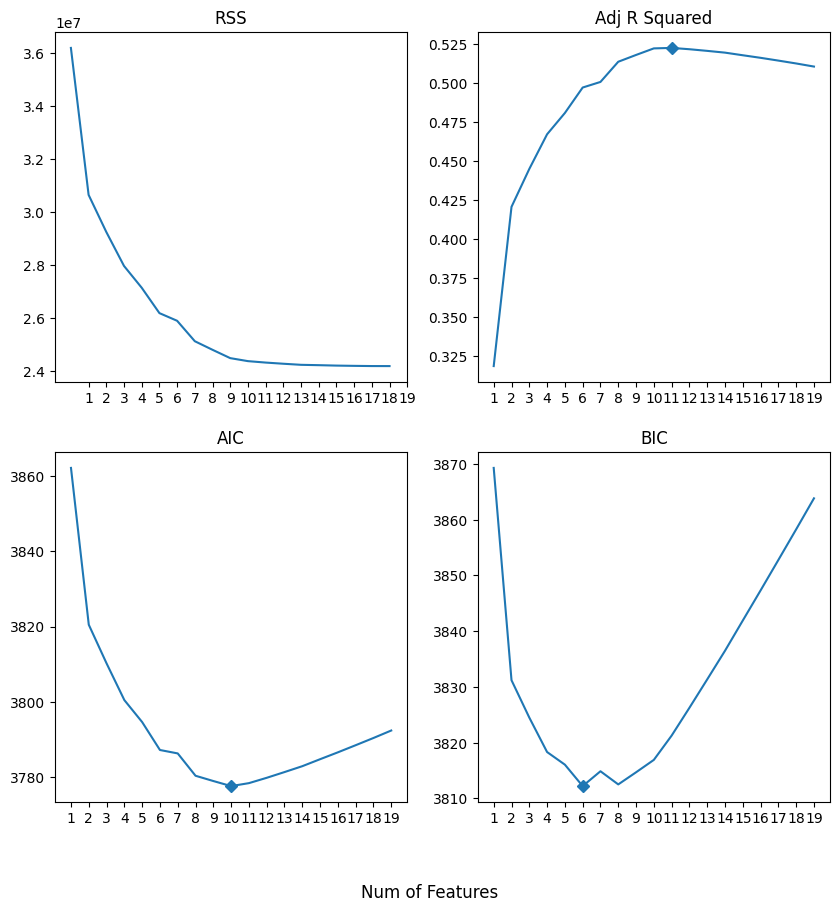

In [16]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.supxlabel('Num of Features')

num_of_features = np.arange(1, 20, 1)

axes[0, 0].plot(rss)
axes[0, 0].set_title('RSS')
axes[0, 0].set_xticks(np.arange(1, 20, 1))

axes[0, 1].plot(num_of_features, r2_adj, markevery=[np.argmax(r2_adj)], marker='D')
axes[0, 1].set_title('Adj R Squared')
axes[0, 1].set_xticks(np.arange(1, 20, 1))

axes[1, 0].plot(num_of_features, aic, markevery=[np.argmin(aic)], marker='D')
axes[1, 0].set_title('AIC')
axes[1, 0].set_xticks(np.arange(1, 20, 1))

axes[1, 1].plot(num_of_features, bic, markevery=[np.argmin(bic)], marker='D')
axes[1, 1].set_title('BIC')
axes[1, 1].set_xticks(np.arange(1, 20, 1))

In [17]:
# Ex.: the model with the lowest BIC is the six-variable model that contains only AtBat, 
# Hits, Walks, CRBI, DivisionW, and PutOuts. 

best_sub_results.model[5].params

const       -31.439736
AtBat        -1.868589
Hits          7.604398
Walks         3.697647
CRBI          0.643017
Division    122.951534
PutOuts       0.264308
dtype: float64

### Forward and Backward Stepwise Selection
Algorithm borrowed from: [mscaudill - Github](https://github.com/mscaudill/IntroStatLearn/blob/master/notebooks/Ch6_Linear_Model_Selection_Regularization/Ch6_Lab_Subset_Selection.ipynb)

In [18]:
def forward_stepwise(X, y, max_features):
    models = []
    feature_list = []
    remaining_features = list(X.columns)
    
    def update_model(current_features, remaining_features):
        best_rss = np.inf
        best_model = None
        
        for new_feature in remaining_features:
            result = process_linear_model(feature_list + [new_feature], X, y)
            if result[1] < best_rss:
                best_rss = result[1]
                best_model = result[0]

        new_feature_list = list(best_model.params.index)[1:]
        
        return new_feature_list, best_model
    
    while remaining_features and len(feature_list) < max_features:
        feature_list, best_model = update_model(feature_list, remaining_features)
        remaining_features = [x for x in list(X.columns) if x not in feature_list]
        models.append([feature_list, best_model])
        
    return models

In [19]:
models_forward = forward_stepwise(X, y, 19)

In [20]:
# The best seven-variable models identified by forward stepwise selection
models_forward[6][1].params

const       -17.335087
CRBI          0.853762
Hits          7.449877
PutOuts       0.253340
Division    127.122393
AtBat        -1.958885
Walks         4.913140
CWalks       -0.305307
dtype: float64

In [21]:
def backward_stepwise(X, y, min_feature):
    models = []
    feature_list = list(X.columns)
    
    def update_model(feature_list):
        best_rss = np.inf
        best_model = None
        best_feature_list = []
        
        for feature in feature_list:
            new_feature_list = [x for x in feature_list if x != feature]
            
            result = process_linear_model(new_feature_list, X, y)
            if result[1] < best_rss:
                best_rss = result[1]
                best_model = result[0]
        
        best_feature_list = list(best_model.params.index)[1:]
        return best_feature_list, best_model
    
    while len(feature_list) > min_feature:
        best_feature_list, best_model = update_model(feature_list)
        feature_list = best_feature_list
        models.append([feature_list, best_model])
    
    return models

In [22]:
models_backward = backward_stepwise(X, y, 0)

In [23]:
# The best seven-variable models identified by backward stepwise selection
models_backward[11][1].params

const       -10.520468
AtBat        -1.976284
Hits          6.757491
Walks         6.055869
CRuns         1.129309
CWalks       -0.716335
Division    116.169217
PutOuts       0.302885
dtype: float64

### Choosing Among Models Using the Validation-Set Approach and Cross-Validation

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [25]:
train_results = find_best_subset(X_train, y_train, 19, 'val_best_sub')

100%|███████████████████████████████████████████| 19/19 [09:07<00:00, 28.79s/it]


In [26]:
train_results = pd.read_pickle('../data/val_best_sub.pkl')

In [27]:
MSEs = []

for model in train_results.model:
    features = list(model.params.index)[1:]
    model_X_test = X_test[features]
    pred = model.predict(sm.add_constant(model_X_test))
    
    MSEs.append(np.mean((pred-y_test)**2))

print(MSEs)

[118361.56861419103, 130966.87007469594, 119625.21024441476, 134907.98853060044, 112643.0497828908, 107270.94757030439, 116458.80105100089, 106841.13014819431, 105173.66277640506, 106397.80219778312, 108477.95629842635, 108578.20210232896, 109159.87954120905, 111403.26719826671, 111938.3352414883, 112079.71684100281, 118275.23374471876, 116725.61036416858, 116690.46856661158]


In [28]:
# finding the best model among trained models with lowest test mse
min_mse_idx, min_mse = np.argmin(MSEs), np.min(MSEs)
min_mse_idx, min_mse

(8, 105173.66277640506)

In [29]:
# Best subset selection result using cross-validation method
train_results.model[min_mse_idx].params

const       142.787538
AtBat        -1.972139
Hits          5.773220
Walks         4.363040
CAtBat       -0.457920
CHits         1.713801
CHmRun        2.122356
Division    125.778852
PutOuts       0.399087
Assists       0.246362
dtype: float64

In [30]:
# Best subset selection result for the same number of variables,
# using all the dataset
best_sub_results.model[min_mse_idx].params

const        30.900099
AtBat        -1.936768
Hits          6.656721
Walks         5.552044
CAtBat       -0.099539
CRuns         1.250671
CRBI          0.661768
CWalks       -0.777985
Division    115.349501
PutOuts       0.277731
dtype: float64

Text(0, 0.5, 'Test MSE')

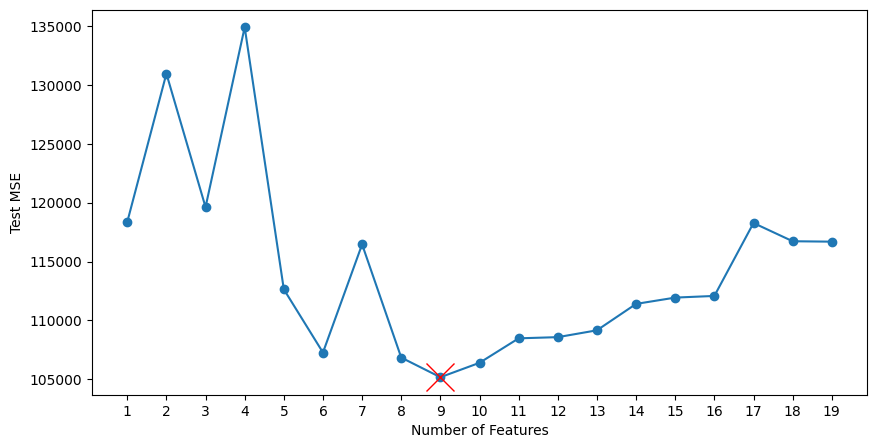

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(np.arange(1, 20, 1), MSEs, marker='o')
ax.plot(min_mse_idx+1, min_mse, 'rx', markersize=20)
ax.set_xticks(np.arange(1, 20, 1))

ax.set_xlabel('Number of Features')
ax.set_ylabel('Test MSE')

In [32]:
# Using K-Fold Validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=17)
kf.get_n_splits(X)

kf_results = []
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    kf_train_result = find_best_subset(X_train, y_train, 13, 'a')
    
    kf_MSEs = []
    for model in kf_train_result.model:
        features = list(model.params.index)[1:]
        model_X_test = X_test[features]
        pred = model.predict(sm.add_constant(model_X_test))

        kf_MSEs.append(np.mean((pred-y_test)**2))
    
    min_mse_idx = np.argmin(kf_MSEs)
    kf_results.append((kf_MSEs[min_mse_idx], kf_train_result.model[min_mse_idx]))

kf_results

100%|██████████████████████████████████████████| 13/13 [27:37<00:00, 127.48s/it]


[(50112.65698394925,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1571476a0>),
 (115646.27321210738,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x157145f60>),
 (146478.58178404075,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x15713a560>),
 (120015.17538090322,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x15715ae90>),
 (181112.34272573615,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1571475b0>),
 (44894.93816313393,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x15715a6e0>),
 (104453.751819396,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1571467a0>),
 (50670.413290977674,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x157158700>),
 (194113.97375830828,
  <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x157147910>),
 (64581.48489161762,
  <statsmodels.regression.linear_model.Regressi

In [41]:
# the mean MSE across folds
test_mse = np.mean(np.array(kf_results)[:,0])
test_mse

107207.95920101705